
<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  Business Data Analytics - Practice Session_03  </font></center></h1>
<h2><center> <font color='black'> Customer segmentation (Clustering)</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2020</font></center></h3>
</div>

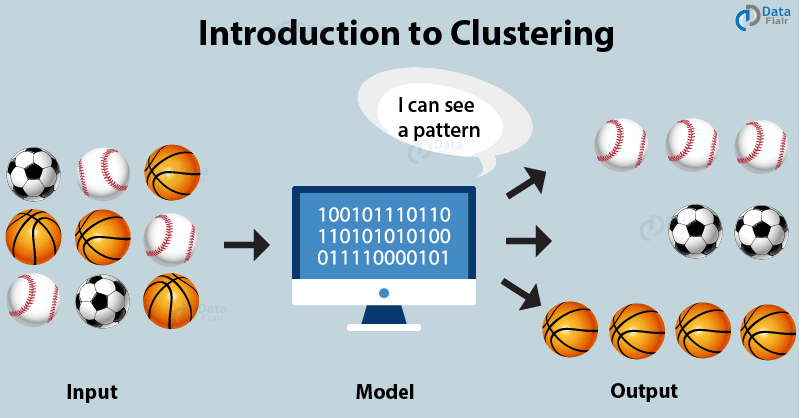

In [0]:
from IPython.display import Image
Image(filename='clustering.png')
#print("hh")
# source: https://data-flair.training/blogs/clustering-in-machine-learning/

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## What is Customer Segmentation?

* **Customer segmentation** is a method of dividing customers into groups or clusters on the basis of common characteristics `(what characteristics?)`. 
    1. `Customer's demographic characteristics` such as occupation, gender, age, location, and marital status.
    2.  `Psychographic characteristics` such as social class, lifestyle and personality characteristics and behavioral characteristics such as spending, consumption habits, product/service usage, and previously purchased products.
    3. Using various `company's characteristics` such as the size of the company, type of industry, and location.



## But first off, why we do segmentation?

* Because you can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.

* You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on churn probability and take actions. But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business:


## Today's practice session:

* Today practice session is about customer segmentation, which has become an essential part of marketing. During the lecture we discussed different ways of data segmentation. During the practice we will deal with the:
    1. **RFM model**     
    2. `Automatic segmentation` discovery via `kmeans` and `hierarchical` clustering.


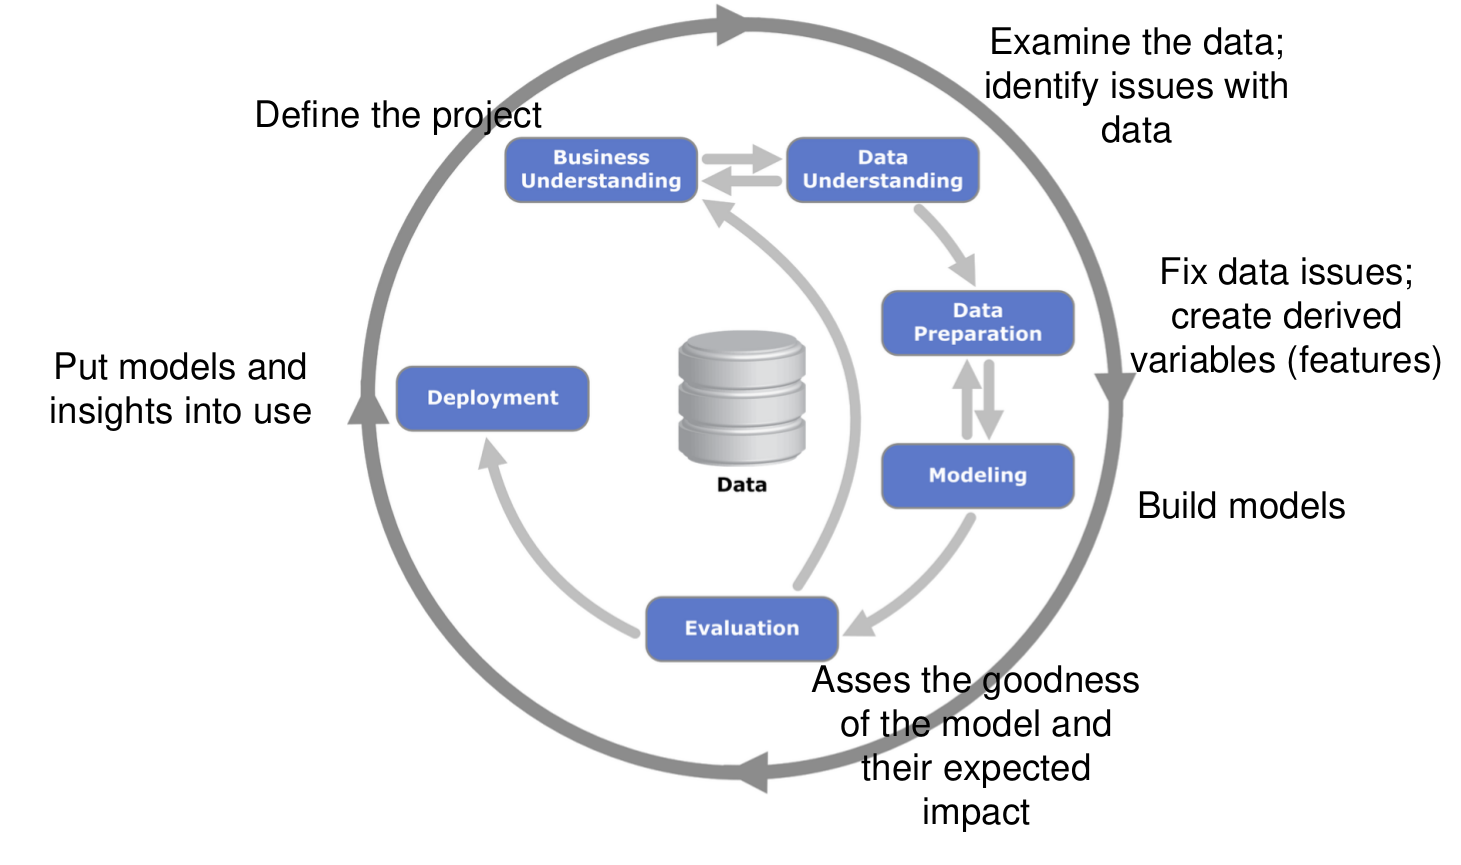

In [0]:
from IPython.display import Image
Image(filename='bda.png') 

### Load the dataset, understand and prepare it: 
    1. This dataset contains all purchases made for an online retail company based in the UK during an eight months period.

In [0]:
#import modules
import numpy as np # for arrays
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt # for date data type

plt.style.use("ggplot")


In [0]:
#load our data from CSV
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [0]:
#drop_duplicates()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null object
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
Country        536641 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [0]:
# missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [0]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null object
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


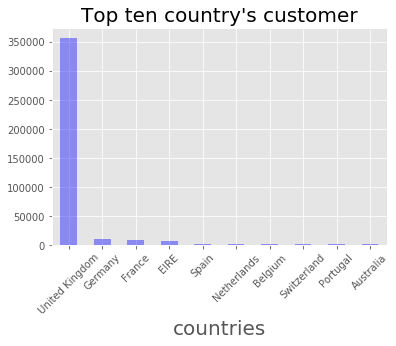

In [0]:
#Top ten country's customer
# Get a color map
import matplotlib.cm as cm

my_cmap = cm.get_cmap('jet')

df.Country.value_counts()[:10].plot(kind='bar', color='b', alpha=0.4, )

plt.title("Top ten country's customer", fontsize=20);
plt.xlabel("countries", fontsize=20);
plt.xticks(rotation=45);


In the given dataset, you can observe most of the customers are from the "United Kingdom". So, you can filter data for United Kingdom customer.

In [0]:
# filter data to include only uk_data
uk_data=df[df.Country=='United Kingdom']
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Ex 1:

1. Please report the descriptive analytics for uk_data? If something is incorrect in these statistics please report it and illustrate how to deal with it?

In [0]:
# TODO: descriptive statistics
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [0]:
# TODO
uk_data = uk_data[(uk_data['Quantity'])>0]
uk_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


## RFM

1. RFM stands for `Recency (no of inactive customers)` - `Frequency` - `Monetary (revenue)` Value. Theoretically we will have **segments - clusters** like below:

    * **Low Value:** Customers who are less active than others `(low recency)`, not very frequent buyer/visitor and generates very low `(low frequency)` - zero - maybe negative revenue `(low revenue)`.
    * **Mid Value:** In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
    * **High Value:** `The group we don’t want to lose`. High Revenue, Frequency and low Inactivity.
    
    
2. Filter required Columns

    * Here, you can filter the necessary columns for RFM analysis. You only need her five columns `CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice`. **CustomerId** will uniquely define your customers, **InvoiceDate** help you calculate recency of purchase, **InvoiceNo** helps you to count the number of time transaction performed(frequency). **Quantity purchased** in each transaction and **UnitPrice** of each unit purchased by the customer will help you to calculate the total purchased amount.
    


In [0]:
# filter cols
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

# add total price for each invoice
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']


uk_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,12/1/2010 8:26,536365,6,2.55,15.30
1,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
2,17850.0,12/1/2010 8:26,536365,8,2.75,22.00
3,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
4,17850.0,12/1/2010 8:26,536365,6,3.39,20.34


#### RFM Analysis: 

* Here, you are going to perform following opertaions:
    * For `Recency`, Calculate the number of days between present date and date of last purchase each customer. 
    * For `Frequency`, Calculate the number of orders for each customer.
    * For `Monetary`, Calculate sum of purchase price for each customer.


#### 1. Recency

In [0]:
import plotly.offline as pyoff
import plotly.graph_objs as go

# convert InvoiceDate to date date type
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


#create a generic user dataframe to keep CustomerID and new segmentation scores (RFM)
tx_user = pd.DataFrame(uk_data['CustomerID'].unique())
tx_user.columns = ['CustomerID']
print(tx_user.head())

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = uk_data.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
print(tx_max_purchase.head())

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
print(tx_user.head())

# plot a recency histogram distribution of recency across our customers.

plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

plot_layout = go.Layout(
        title='distribution of recency across our customers.'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   CustomerID
0     17850.0
1     13047.0
2     13748.0
3     15100.0
4     15291.0
   CustomerID     MaxPurchaseDate
0     12346.0 2011-01-18 10:01:00
1     12747.0 2011-12-07 14:34:00
2     12748.0 2011-12-09 12:20:00
3     12749.0 2011-12-06 09:56:00
4     12820.0 2011-12-06 15:12:00
   CustomerID  Recency
0     17850.0      371
1     13047.0       31
2     13748.0       95
3     15100.0      333
4     15291.0       25


#### 2. Frequency
* To create frequency clusters, we need to find total number orders for each customer. First calculate this and see how frequency look like in our customer database:

## Ex 2: 

1. Calculate the Frequency of unique customers? 

    * hint: use groupby() and count()

In [0]:
#TODO: Frequency
import plotly.offline as pyoff
import plotly.graph_objs as go

# convert InvoiceDate to date date type
#uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


#create a generic user dataframe to keep CustomerID and new segmentation scores (RFM)
#tx_user = pd.DataFrame(uk_data['CustomerID'].unique())
#tx_user.columns = ['CustomerID']
##print(tx_user.head())

#get the max purchase date for each customer and create a dataframe with it
# tx_max_purchase = uk_data.groupby('CustomerID').InvoiceDate.max().reset_index()
# tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
# print(tx_max_purchase.head())

tx_frequency = uk_data.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID', 'Frequency']


#we take our observation point as the max invoice date in our dataset
#tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')
print(tx_user.head())

# plot a recency histogram distribution of recency across our customers.

plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='distribution of Frequency across our customers.'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

   CustomerID  Recency  Frequency
0     17850.0      371        297
1     13047.0       31        172
2     13748.0       95         28
3     15100.0      333          3
4     15291.0       25        103


#### 3. Revenue

* Let’s see how our customer database looks like when we cluster them based on revenue. We will calculate revenue for each customer, plot a histogram and apply the same clustering method.

In [0]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [0]:
#calculate revenue for each customer
uk_data['Revenue'] = uk_data['UnitPrice'] * uk_data['Quantity']
tx_revenue = uk_data.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')
print(tx_user.head())

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   CustomerID  Recency  Frequency  Revenue
0     17850.0      371        297  5391.21
1     13047.0       31        172  3237.54
2     13748.0       95         28   948.25
3     15100.0      333          3   876.00
4     15291.0       25        103  4668.30


In [0]:
RFM = tx_user
RFM = RFM.set_index('CustomerID')
RFM.head()

,Recency,Frequency,Revenue
CustomerID,,,
17850.0,301,309,5303.48
13047.0,31,196,3079.10
13748.0,95,28,948.25
15100.0,329,6,635.10
15291.0,25,109,4596.51


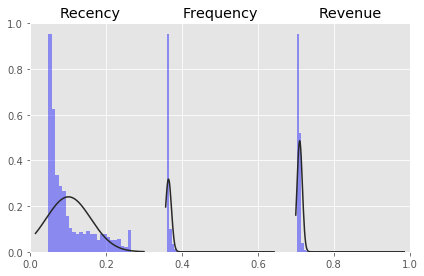

In [0]:
import seaborn as sns
from scipy.stats import norm

from scipy.stats import norm
fig, ax = plt.subplots()


for i, col in enumerate(RFM.columns):
    ax=fig.add_subplot(1, 3, i+1)
    sns.distplot(RFM[col],fit=norm, kde=False,ax=ax, color='b')
    plt.title(col);
    plt.axis('off')
plt.tight_layout()


**Computing Quantile of RFM values**

1. Customers with the `lowest recency`, `highest frequency` and `monetary amounts` considered as top customers.

2. **qcut()** is Quantile-based discretization function. `qcut` bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [0]:
rfm = RFM
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Revenue'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Revenue,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
17850.0,301,309,5303.48,4,1,1
13047.0,31,196,3079.10,2,1,1
13748.0,95,28,948.25,3,3,2
15100.0,329,6,635.10,4,4,2
15291.0,25,109,4596.51,2,1,1


In [0]:
rfm.r_quartile.unique()

[4, 2, 3, 1]
Categories (4, object): [1 < 2 < 3 < 4]

**RFM Result Interpretation**

1. Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [0]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head(10)

,Recency,Frequency,Revenue,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17850.0,301,309,5303.48,4,1,1,411
13047.0,31,196,3079.10,2,1,1,211
13748.0,95,28,948.25,3,3,2,332
15100.0,329,6,635.10,4,4,2,442
15291.0,25,109,4596.51,2,1,1,211
14688.0,7,356,5055.61,1,1,1,111
17809.0,15,64,4627.62,1,2,1,121
15311.0,0,2478,59284.19,1,1,1,111
14527.0,2,1010,7709.69,1,1,1,111


In [0]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('Revenue', ascending=False)
#rfm.head()

,Recency,Frequency,Revenue,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,433,256438.49,1,1,1,111
17450.0,7,350,187322.17,1,1,1,111
17511.0,2,1076,88125.38,1,1,1,111
16684.0,3,281,65892.08,1,1,1,111
13694.0,3,584,62690.54,1,1,1,111
...,...,...,...,...,...,...,...
12877.0,3,154,1535.77,1,1,1,111
16283.0,5,168,1531.51,1,1,1,111
14321.0,10,123,1530.75,1,1,1,111


* The RFM approach is widely used and has a lot of use cases on practice. We can find our best and worst customers, we can decide where to focus our attention, to whom send the campaign and offer discounts. It is clear and reasonably easy to interpret (the only problem is how to visualize the three dimensions simultaniously). However, it requires your attention and highly depends on your choices. It is unlikely you can discover something unexpected. The automatic segmentation is a foray into uncharted territory of your data. Let’s see how it can be done.


## K-means clustering:
* Now it is the fun part. We are going to apply `K-means` clustering to assign a `recency, frequency, and revenue  score`. But we should tell **how many clusters we need to K-means algorithm**. To find it out, we will apply **Elbow Method.** `Elbow Method` simply tells the optimal cluster number for optimal inertia. Code snippet and Inertia graph are as follows:

## How to build a machine learning model (Cluster algorithm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

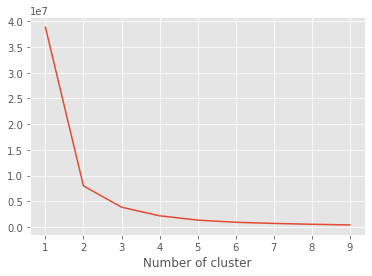

In [0]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
#print(sse)
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

* Here it looks like **3** is the optimal one. Based on `business requirements`, we can go ahead with less or more clusters. We will be selecting 4 for this example:

**Recency**

In [0]:
#build 4 clusters for recency and add it to dataframe

# get an instance from KMeans algorithm as an object
kmeans = KMeans(n_clusters=4)

# teach your algorithm 
kmeans.fit(tx_user[['Recency']])

# predict the structure based on Recency
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
print(tx_user.head())

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)
tx_user.head()
tx_user.groupby('RecencyCluster')['Recency'].describe()

   CustomerID  Recency  Frequency  Revenue  RecencyCluster
0     17850.0      371        297  5391.21               3
1     13047.0       31        172  3237.54               2
2     13748.0       95         28   948.25               0
3     15100.0      333          3   876.00               3
4     15291.0       25        103  4668.30               2


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,442.0,307.135747,39.591504,250.0,272.25,302.5,336.0,373.0
1,550.0,192.429091,31.356309,139.0,168.00,190.0,217.0,249.0
2,891.0,84.542088,23.985978,53.0,64.00,78.0,103.0,138.0
3,2038.0,19.937684,14.923945,0.0,7.00,17.0,30.0,52.0


**Frequency**

## EX 3:

    1. Using KMeans, and order_cluster(), cluster the customers based on Frequency?

In [0]:
tx_user.head(100)

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment
0,17850.0,371,297,5391.21,0,2,1,3,Mid-Value
1,14688.0,7,327,5630.87,3,2,1,6,High-Value
2,13408.0,1,478,28117.04,3,2,1,6,High-Value
3,13767.0,1,368,17220.36,3,2,1,6,High-Value
4,15513.0,32,308,14758.22,3,2,1,6,High-Value
...,...,...,...,...,...,...,...,...,...
95,18172.0,14,189,7561.68,3,2,1,6,High-Value
96,17139.0,15,478,10668.47,3,2,1,6,High-Value
97,16187.0,31,295,6911.44,3,2,1,6,High-Value
98,17416.0,29,269,6893.42,3,2,1,6,High-Value


In [0]:
#TODO
#build 4 clusters for recency and add it to dataframe

# get an instance from KMeans algorithm as an object
kmeans = KMeans(n_clusters=4)

# teach your algorithm 
kmeans.fit(tx_user[['Frequency']])

# predict the structure based on Recency
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])
print(tx_user.head())


tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)
tx_user.head()
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

   CustomerID  Recency  Frequency  ...  RevenueCluster  OverallScore     Segment
0     17850.0      371        297  ...               1             3   Mid-Value
1     14688.0        7        327  ...               1             6  High-Value
2     13408.0        1        478  ...               1             6  High-Value
3     13767.0        1        368  ...               1             6  High-Value
4     15513.0       32        308  ...               1             6  High-Value

[5 rows x 9 columns]


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3474.0,49.088946,44.473150,1.0,15.0,33.0,72.00,188.0
1,422.0,326.938389,132.619026,189.0,224.0,285.5,392.50,799.0
2,22.0,1285.818182,489.033024,851.0,970.5,1112.5,1446.25,2700.0
3,3.0,5851.333333,1747.375270,4596.0,4853.5,5111.0,6479.00,7847.0


**Revenue**

In [0]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3716.0,1004.927071,1055.533730,0.00,285.8525,604.13,1352.9975,5346.23
1,179.0,9713.404078,5139.408715,5360.63,6304.4150,7832.47,10945.2950,28882.44
2,23.0,52726.201739,16490.086325,31833.68,38535.1750,51527.30,62903.7600,91062.38
3,3.0,207560.196667,46963.820480,168472.50,181511.6450,194550.79,227104.0450,259657.30


#### Overall Score: 

* Awesome! We have scores (cluster numbers) for `recency, frequency & revenue.` Let’s create an overall score out of them:

In [0]:
tx_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,OverallScore,Segment,FrequencyCluster,RevenueCluster
0,17850.0,371,297,5391.21,0,3,Mid-Value,1,1
1,14688.0,7,327,5630.87,3,6,High-Value,1,1
2,13408.0,1,478,28117.04,3,6,High-Value,1,1
3,13767.0,1,368,17220.36,3,6,High-Value,1,1
4,15513.0,32,308,14758.22,3,6,High-Value,1,1


In [0]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
#print(tx_user.head())
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,307.027397,22.559361,347.582763
1,193.199262,31.671587,510.852530
2,86.247674,45.540698,954.632595
3,23.621221,67.149907,1205.831790
4,14.637821,279.224359,3941.927500
5,9.974576,410.432203,10980.387542
6,6.142857,886.428571,34371.246190
7,3.000000,1260.833333,119398.583333
8,1.333333,5851.333333,46625.363333


* The scoring above clearly shows us that customers with score 8 is our best customers whereas 0 is the worst.


* To keep things simple, better we name these scores:
    * `0 to 2:` Low Value
    * `3 to 4:` Mid Value
    * `5+: High` Value


* We can easily apply this naming on our dataframe:

In [0]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [0]:
tx_user

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,OverallScore,Segment,FrequencyCluster,RevenueCluster
0,17850.0,371,297,5391.21,0,2,Low-Value,1,1
1,14688.0,7,327,5630.87,3,5,High-Value,1,1
2,13408.0,1,478,28117.04,3,5,High-Value,1,1
3,13767.0,1,368,17220.36,3,5,High-Value,1,1
4,15513.0,32,308,14758.22,3,5,High-Value,1,1
...,...,...,...,...,...,...,...,...,...
3916,17841.0,1,7847,40991.57,3,8,High-Value,3,2
3917,14096.0,3,5111,65164.79,3,8,High-Value,3,2
3918,17450.0,7,337,194550.79,3,7,High-Value,1,3
3919,18102.0,0,431,259657.30,3,7,High-Value,1,3


In [0]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## Ex 4:
1. USing the above plot code, plot the three clusters based on Recency on x-axis and Revenue on y-axis.

In [0]:
#TODO

In [0]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
def func(x):
    if x == "Low-Value":
        return 'Low-Value'
    elif x == "High-Value":
        return 'High-Value'
    else:
        return "Mid-Value"
    

tx_user['Customer_value '] = tx_user["Segment"].apply(func)

In [0]:
import plotly.express as px
from random import randint

dff =tx_user
fig = px.scatter_3d(dff, x='Revenue', y='Frequency', z='Recency',
              color='Customer_value ', size_max=20,opacity=0.7)
fig.show()



## Hierarchical Clustering

The second clustering method that we can use for segmentation is hierarchical clustering

In [0]:
tx_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment,Customer_value
0,17850.0,301,309,5303.48,0,1,0,1,Low-Value,Low-Value
1,15808.0,305,197,3641.07,0,1,0,1,Low-Value,Low-Value
2,13047.0,31,196,3079.10,3,1,0,4,Mid-Value,Mid-Value
3,14688.0,7,356,5055.61,3,1,0,4,Mid-Value,Mid-Value
4,13448.0,16,198,3460.99,3,1,0,4,Mid-Value,Mid-Value


In [0]:
df = tx_user.iloc[:, : 4]

from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(df)
clusters = model.predict(df)
df['clusters'] = clusters
df.head()

,CustomerID,Recency,Frequency,Revenue,clusters
0,17850.0,371,297,5391.21,0
1,14688.0,7,327,5630.87,3
2,13408.0,1,478,28117.04,3
3,13767.0,1,368,17220.36,3
4,15513.0,32,308,14758.22,3


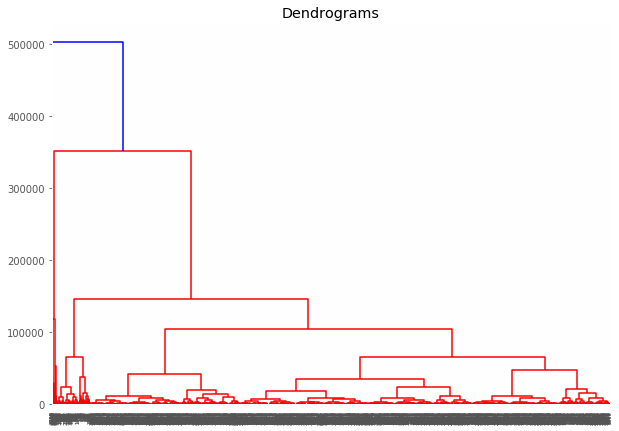

In [0]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
plt.xticks(rotation=45)
dend = shc.dendrogram(shc.linkage(df, method='ward'))


The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 25 and cut the dendrogram:

**Epic tutorial on dendrograms:**

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

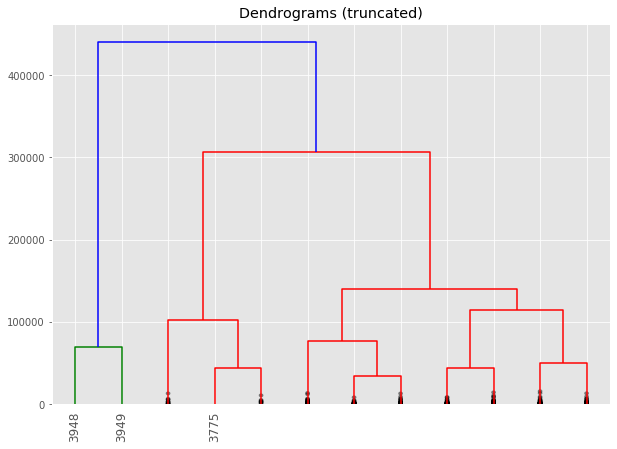

In [0]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms (truncated)")  

shc.dendrogram(
    shc.linkage(df, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
);

### Limitation of k-means

Simplicity of k-means is a big advantage for fast processing of large scale data. But this very simplicity also leads to practical challenges in its application. 

In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.

#### Gaussian mixture models (GMMs), 

   * GMM: can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.

### Generalizing to Gaussian Mixture Models (GMM)

Two ideas may come to mind,
- You could measure uncertainty in cluster assignment by comparing the distances of each point to all cluster centers, rather than focusing on just the closest. 
- You might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters.

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means.

However, because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the `predict_proba` method. This returns a matrix of size `[n_samples, n_clusters]` which measures the probability that any point belongs to the given cluster.

In [0]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4).fit(df)
labels = gmm.predict(df)
df['labels'] = labels



def func(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3
    

df['Customer_value '] = df["labels"].apply(func)


import plotly.express as px
from random import randint
#df['Customer_value'] = 
dff =df
fig = px.scatter_3d(dff, x='Revenue', y='Frequency', z='Recency',
              color='Customer_value ', size_max=20,opacity=0.7)
fig.show()




